<a href="https://colab.research.google.com/github/sinhaxx/CollegeManagementSystem/blob/main/002211001130_SUBHAS_CHANDRA_SHIT_ML_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# ------------------ Load Breast Cancer Dataset --------------------
def load_breast_cancer_data():
    data = load_breast_cancer()
    X = data.data
    y = data.target
    return X, y

# ------------------ Load Ionosphere Dataset --------------------
def load_ionosphere_data():
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/ionosphere.data"
    column_count = 34  # 34 columns: 34th is the label
    df = pd.read_csv(url, header=None)

    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values

    # Convert labels from 'g', 'b' to 0, 1
    y = LabelEncoder().fit_transform(y)

    return X, y

# ------------------ Scale Features --------------------
def preprocess_data(X, y):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled, y

# Test loading
X_breast, y_breast = preprocess_data(*load_breast_cancer_data())
X_iono, y_iono = preprocess_data(*load_ionosphere_data())

print(f"Breast Cancer Dataset: X={X_breast.shape}, y={np.unique(y_breast)}")
print(f"Ionosphere Dataset: X={X_iono.shape}, y={np.unique(y_iono)}")


Breast Cancer Dataset: X=(569, 30), y=[0 1]
Ionosphere Dataset: X=(351, 34), y=[0 1]


HMM detaset


In [2]:
! pip install hmmlearn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 kB 5.0 MB/s eta 0:00:00


In [3]:
from hmmlearn.hmm import GaussianHMM
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------ Train HMM Classifier --------------------
def train_hmm_classifier(X_train, y_train, model_type="gaussian", n_components=4, n_iter=100):
    class_models = {}

    for label in np.unique(y_train):
        # Filter data for current class
        X_class = X_train[y_train == label]

        # hmmlearn expects 2D arrays; we treat each sample as a sequence of 1 step
        model = GaussianHMM(n_components=n_components, covariance_type='diag', n_iter=n_iter, random_state=42)
        model.fit(X_class)
        class_models[label] = model

    return class_models

# ------------------ Predict with HMM Classifier --------------------
def predict_hmm(class_models, X_test):
    predictions = []

    for x in X_test:
        scores = {label: model.score(x.reshape(1, -1)) for label, model in class_models.items()}
        pred_label = max(scores, key=scores.get)
        predictions.append(pred_label)

    return np.array(predictions)

# ------------------ Evaluate Model --------------------
def evaluate_model(y_test, y_pred, title="Confusion Matrix"):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print("Confusion Matrix:\n", cm)

    # Plot Confusion Matrix Heatmap
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    return acc, prec, rec, f1


Accuracy:  0.9474
Precision: 0.9221
Recall:    1.0000
F1 Score:  0.9595
Confusion Matrix:
 [[37  6]
 [ 0 71]]


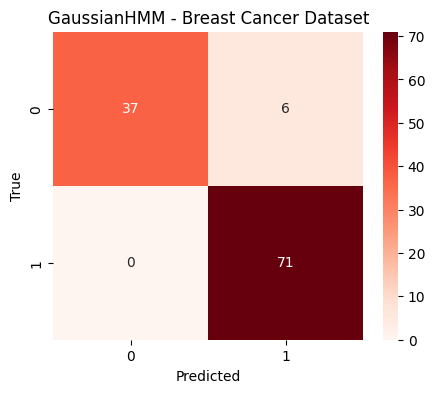

(0.9473684210526315, 0.922077922077922, 1.0, 0.9594594594594594)

In [4]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_breast, y_breast, test_size=0.2, random_state=42)

# Train HMM classifier
hmm_models = train_hmm_classifier(X_train, y_train, model_type="gaussian", n_components=4)

# Predict
y_pred = predict_hmm(hmm_models, X_test)

# Evaluate
evaluate_model(y_test, y_pred, title="GaussianHMM - Breast Cancer Dataset")


In [5]:
from hmmlearn.hmm import MultinomialHMM
from sklearn.preprocessing import KBinsDiscretizer

# ------------------ Discretize Features --------------------
def discretize_data(X, n_bins=10):
    kb = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
    X_disc = kb.fit_transform(X)
    return X_disc.astype(int)


In [6]:
# ------------------ Train Multinomial HMM Classifier --------------------
def train_multinomial_hmm_classifier(X_train, y_train, n_components=4, n_iter=100, n_bins=10):
    class_models = {}

    for label in np.unique(y_train):
        X_class = X_train[y_train == label]

        # Model expects 1D sequences of integers for each sample
        model = MultinomialHMM(n_components=n_components, n_iter=n_iter, random_state=42)
        model.fit(X_class)
        class_models[label] = model

    return class_models

# ------------------ Predict with Multinomial HMM --------------------
def predict_multinomial_hmm(class_models, X_test):
    predictions = []

    for x in X_test:
        # No need to reshape x here, as it already has the correct shape (1, n_features)
        scores = {label: model.score(x.reshape(1, -1)) for label, model in class_models.items()} # reshape to (1, n_features)
        pred_label = max(scores, key=scores.get)
        predictions.append(pred_label)

    return np.array(predictions)

https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


Accuracy:  0.5965
Precision: 0.6289
Recall:    0.8592
F1 Score:  0.7262
Confusion Matrix:
 [[ 7 36]
 [10 61]]


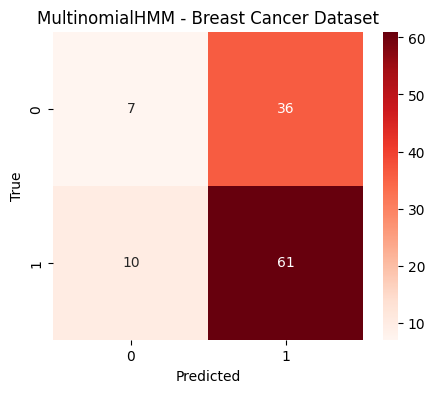

(0.5964912280701754,
 0.6288659793814433,
 0.8591549295774648,
 0.7261904761904762)

In [7]:
# Discretize data
X_breast_disc = discretize_data(X_breast, n_bins=8)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_breast_disc, y_breast, test_size=0.2, random_state=42)

# Train
mult_models = train_multinomial_hmm_classifier(X_train, y_train, n_components=4, n_bins=8)

# Predict
y_pred = predict_multinomial_hmm(mult_models, X_test)

# Evaluate
evaluate_model(y_test, y_pred, title="MultinomialHMM - Breast Cancer Dataset")


Accuracy:  0.4507
Precision: 0.8333
Recall:    0.1163
F1 Score:  0.2041
Confusion Matrix:
 [[27  1]
 [38  5]]


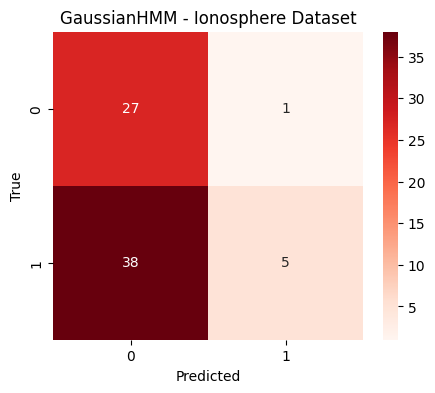

(0.4507042253521127,
 0.8333333333333334,
 0.11627906976744186,
 0.20408163265306123)

In [8]:
# Split Ionosphere Data
X_train, X_test, y_train, y_test = train_test_split(X_iono, y_iono, test_size=0.2, random_state=42)

# Train GaussianHMM per class
hmm_models_iono = train_hmm_classifier(X_train, y_train, model_type="gaussian", n_components=4)

# Predict
y_pred_iono = predict_hmm(hmm_models_iono, X_test)

# Evaluate
evaluate_model(y_test, y_pred_iono, title="GaussianHMM - Ionosphere Dataset")


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:262: UserWarning: Feature 1 is constant and will be replaced with 0.
  warnings.warn(
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


Accuracy:  0.7042
Precision: 0.6719
Recall:    1.0000
F1 Score:  0.8037
Confusion Matrix:
 [[ 7 21]
 [ 0 43]]


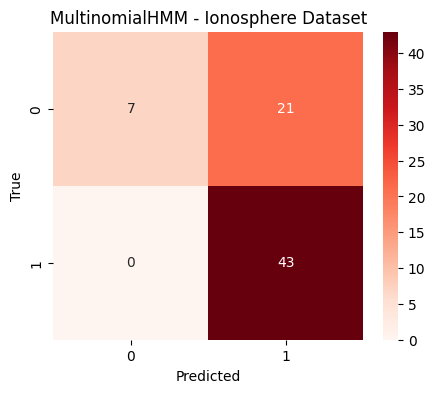

(0.704225352112676, 0.671875, 1.0, 0.8037383177570093)

In [9]:
# Discretize Ionosphere features
X_iono_disc = discretize_data(X_iono, n_bins=8)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_iono_disc, y_iono, test_size=0.2, random_state=42)

# Train
mult_models_iono = train_multinomial_hmm_classifier(X_train, y_train, n_components=4, n_bins=8)

# Predict
y_pred_iono_mult = predict_multinomial_hmm(mult_models_iono, X_test)

# Evaluate
evaluate_model(y_test, y_pred_iono_mult, title="MultinomialHMM - Ionosphere Dataset")


In [10]:
from sklearn.metrics import roc_curve, roc_auc_score

# --------- Compute ROC and AUC from likelihood scores ----------
def plot_roc_auc(class_models, X_test, y_test, title="ROC Curve"):
    scores_1 = []
    for x in X_test:
        x = x.reshape(1, -1)
        # Score for class 1
        s1 = class_models[1].score(x)
        s0 = class_models[0].score(x)
        # Use score difference as proxy for probability
        scores_1.append(s1 - s0)

    # Convert to numpy
    scores_1 = np.array(scores_1)
    fpr, tpr, thresholds = roc_curve(y_test, scores_1)
    auc = roc_auc_score(y_test, scores_1)

    # Plot
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}", color='red')
    plt.plot([0, 1], [0, 1], '--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    print(f"AUC Score: {auc:.4f}")
    return auc


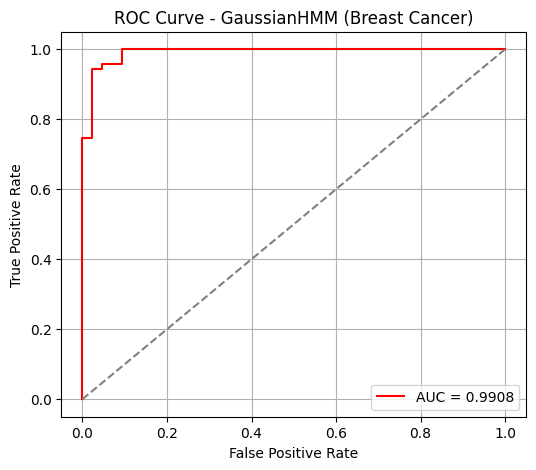

AUC Score: 0.9908


np.float64(0.9908286930887652)

In [11]:
# Use previous models and test data
# Need to use the test data from the Breast Cancer split for the Breast Cancer model
X_train_breast, X_test_breast, y_train_breast, y_test_breast = train_test_split(X_breast, y_breast, test_size=0.2, random_state=42)

plot_roc_auc(hmm_models, X_test_breast, y_test_breast, title="ROC Curve - GaussianHMM (Breast Cancer)")

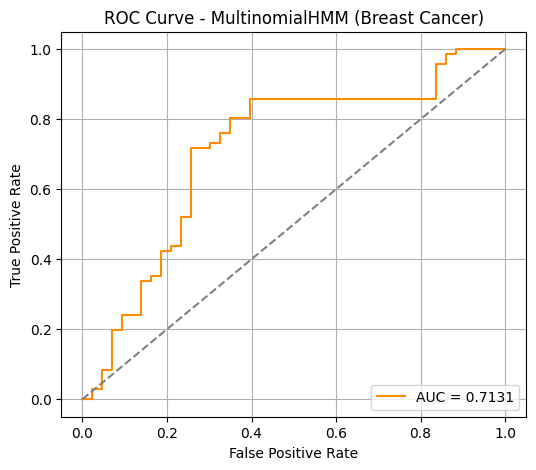

AUC Score: 0.7131


np.float64(0.7130691123485097)

In [12]:
# For MultinomialHMM
def plot_roc_auc_multinomial(class_models, X_test, y_test, title="ROC Curve"):
    scores_1 = []
    for x in X_test:
        # Remove reshaping as x already has shape (1, n_features)
        # x_seq = x.reshape(-1, 1)
        s1 = class_models[1].score(x.reshape(1, -1)) # Reshape to (1, n_features) for scoring
        s0 = class_models[0].score(x.reshape(1, -1)) # Reshape to (1, n_features) for scoring
        scores_1.append(s1 - s0)

    scores_1 = np.array(scores_1)
    fpr, tpr, _ = roc_curve(y_test, scores_1)
    auc = roc_auc_score(y_test, scores_1)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}", color='darkorange')
    plt.plot([0, 1], [0, 1], '--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    print(f"AUC Score: {auc:.4f}")
    return auc

# Run for MultinomialHMM - Breast Cancer
# Need to use the correct test data for the MultinomialHMM on Breast Cancer
X_breast_disc = discretize_data(X_breast, n_bins=8)
X_train_breast_disc, X_test_breast_disc, y_train_breast_disc, y_test_breast_disc = train_test_split(X_breast_disc, y_breast, test_size=0.2, random_state=42)

plot_roc_auc_multinomial(mult_models, X_test_breast_disc, y_test_breast_disc, title="ROC Curve - MultinomialHMM (Breast Cancer)")

In [13]:
def tune_gaussian_hmm(X, y, component_range=range(2, 11), test_size=0.2):
    results = []
    best_model = None
    best_score = 0

    for n_components in component_range:
        print(f"\nTrying n_components = {n_components}")
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

        try:
            models = train_hmm_classifier(X_train, y_train, n_components=n_components)
            y_pred = predict_hmm(models, X_test)

            acc = accuracy_score(y_test, y_pred)
            prec = precision_score(y_test, y_pred)
            rec = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)

            print(f"Accuracy: {acc:.4f}")

            results.append({
                'n_components': n_components,
                'accuracy': acc,
                'precision': prec,
                'recall': rec,
                'f1': f1
            })

            if acc > best_score:
                best_score = acc
                best_model = models
                best_pred = y_pred
                best_y_test = y_test

        except Exception as e:
            print(f"Failed for n_components = {n_components}: {e}")

    return results, best_model, best_pred, best_y_test



Trying n_components = 2
Accuracy: 0.9474

Trying n_components = 3
Accuracy: 0.9386

Trying n_components = 4
Accuracy: 0.9474

Trying n_components = 5
Accuracy: 0.9386

Trying n_components = 6


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.3772

Trying n_components = 7
Accuracy: 0.3772

Trying n_components = 8


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.3772

Trying n_components = 9


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.3772

Trying n_components = 10
Accuracy: 0.4737
Accuracy:  0.9474
Precision: 0.9221
Recall:    1.0000
F1 Score:  0.9595
Confusion Matrix:
 [[37  6]
 [ 0 71]]


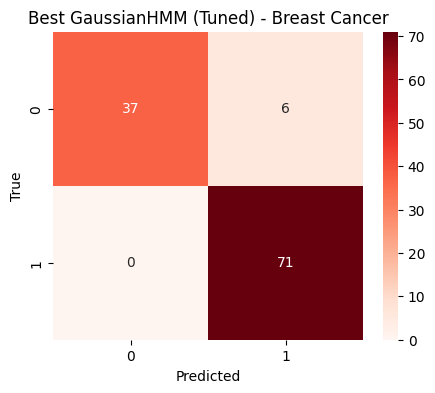

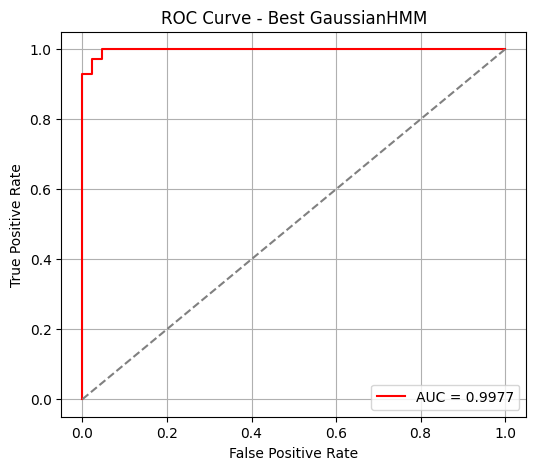

AUC Score: 0.9977


np.float64(0.9977071732721913)

In [14]:
results, best_model, best_pred, best_y_test = tune_gaussian_hmm(X_breast, y_breast)

# Evaluate best model
evaluate_model(best_y_test, best_pred, title="Best GaussianHMM (Tuned) - Breast Cancer")
# Use the test data corresponding to the best model
_, X_test_best, _, y_test_best = train_test_split(X_breast, y_breast, test_size=0.2, random_state=42)
plot_roc_auc(best_model, X_test_best, y_test_best, title="ROC Curve - Best GaussianHMM")

In [16]:
# Convert to DataFrame
df_results = pd.DataFrame(results)
print(df_results.sort_values(by='accuracy', ascending=False))


   n_components  accuracy  precision   recall        f1
0             2  0.947368   0.922078  1.00000  0.959459
2             4  0.947368   0.922078  1.00000  0.959459
1             3  0.938596   0.910256  1.00000  0.953020
3             5  0.938596   0.910256  1.00000  0.953020
8            10  0.473684   1.000000  0.15493  0.268293
4             6  0.377193   0.000000  0.00000  0.000000
5             7  0.377193   0.000000  0.00000  0.000000
6             8  0.377193   0.000000  0.00000  0.000000
7             9  0.377193   0.000000  0.00000  0.000000


In [15]:
comparison_results = []

def add_result(dataset, model_name, acc, prec, rec, f1, auc_score, n_components):
    comparison_results.append({
        "Dataset": dataset,
        "Model": model_name,
        "Accuracy": round(acc, 4),
        "Precision": round(prec, 4),
        "Recall": round(rec, 4),
        "F1-Score": round(f1, 4),
        "AUC": round(auc_score, 4),
        "Best_n_components": n_components
    })


Accuracy:  0.9474
Precision: 0.9221
Recall:    1.0000
F1 Score:  0.9595
Confusion Matrix:
 [[37  6]
 [ 0 71]]


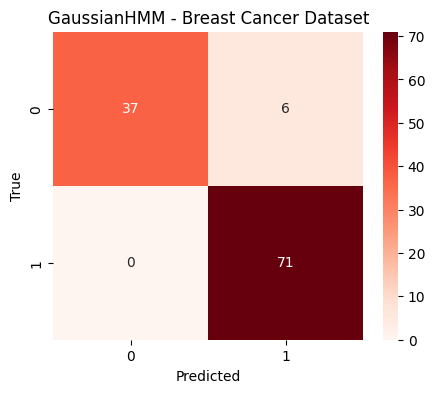

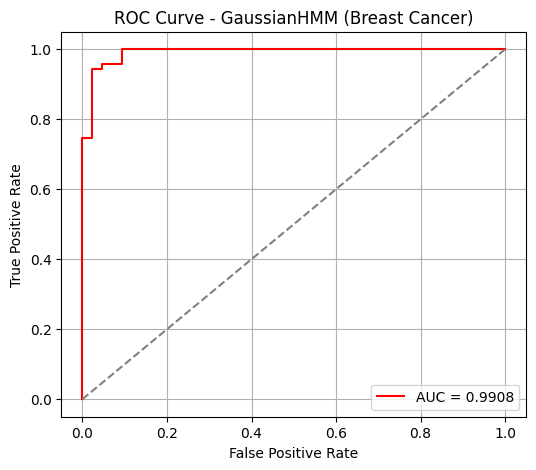

AUC Score: 0.9908


In [17]:
# Example:
# Need to get the metrics for GaussianHMM on Breast Cancer
X_train_breast, X_test_breast, y_train_breast, y_test_breast = train_test_split(X_breast, y_breast, test_size=0.2, random_state=42)
hmm_models_breast = train_hmm_classifier(X_train_breast, y_train_breast, model_type="gaussian", n_components=4)
y_pred_breast_hmm = predict_hmm(hmm_models_breast, X_test_breast)
acc, prec, rec, f1 = evaluate_model(y_test_breast, y_pred_breast_hmm, title="GaussianHMM - Breast Cancer Dataset")
auc_score = plot_roc_auc(hmm_models_breast, X_test_breast, y_test_breast, title="ROC Curve - GaussianHMM (Breast Cancer)")

add_result("Breast Cancer", "GaussianHMM", acc, prec, rec, f1, auc_score, 4)

In [18]:
# Show all results
df_compare = pd.DataFrame(comparison_results)
print(df_compare)

# Optional: save to CSV
df_compare.to_csv("hmm_performance_comparison.csv", index=False)


         Dataset        Model  Accuracy  Precision  Recall  F1-Score     AUC  \
0  Breast Cancer  GaussianHMM    0.9474     0.9221     1.0    0.9595  0.9908   

   Best_n_components  
0                  4  


CNN Detaset (MNIST)


In [19]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize to [0,1]
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

# Reshape to (samples, height, width, channels)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (60000, 28, 28, 1), Test shape: (10000, 28, 28, 1)


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def build_simple_cnn():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12000/12000 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.8911 - loss: 0.3480 - val_accuracy: 0.9818 - val_loss: 0.0542


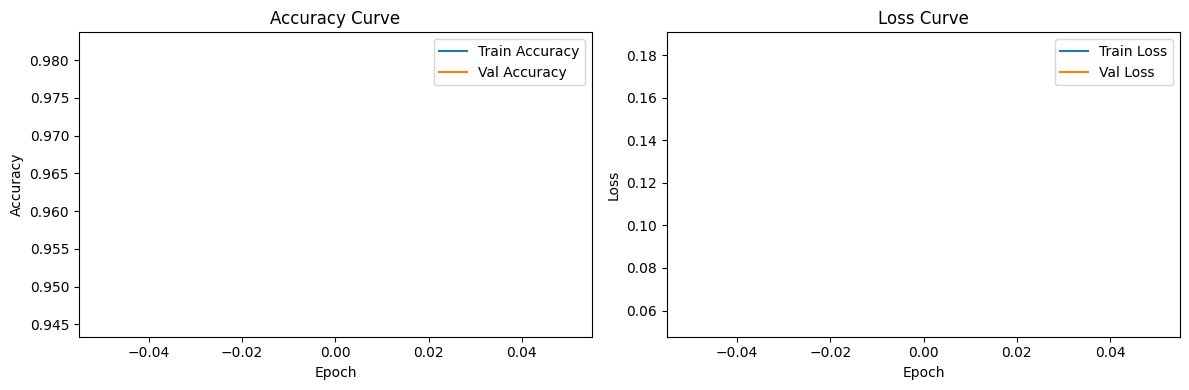

In [21]:
cnn_model = build_simple_cnn()

history = cnn_model.fit(
    X_train, y_train_cat,
    epochs=1,
    batch_size=4,
    validation_split=0.2,
    verbose=1
)

# Plot training & validation accuracy/loss
def plot_training_curves(history):
    plt.figure(figsize=(12, 4))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_curves(history)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.97      0.98       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.96      0.97      1028
           8       0.99      0.98      0.98       974
           9       0.95      0.99      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



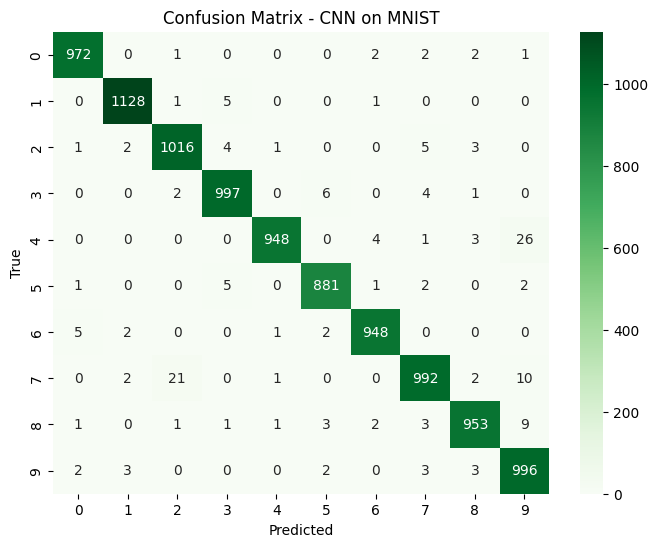

In [22]:
# Predictions
y_pred_probs = cnn_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - CNN on MNIST")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


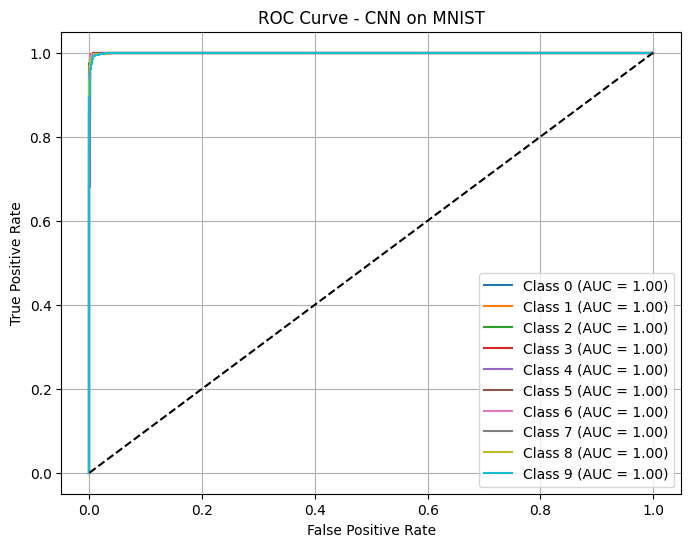

In [23]:
# ROC Curve and AUC for multiclass (one-vs-rest)
fpr = {}
tpr = {}
roc_auc = {}

for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_cat[:, i], y_pred_probs[:, i])
    roc_auc[i] = roc_auc_score(y_test_cat[:, i], y_pred_probs[:, i])

# Plot ROC for one class or macro average
plt.figure(figsize=(8, 6))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - CNN on MNIST')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()


CNN Detaset (CIFAR-10)

In [24]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize to [0, 1]
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Train shape: (50000, 32, 32, 3), Test shape: (10000, 32, 32, 3)


In [25]:
def build_cifar_cnn():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10000/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.3262 - loss: 1.8106 - val_accuracy: 0.5453 - val_loss: 1.2581


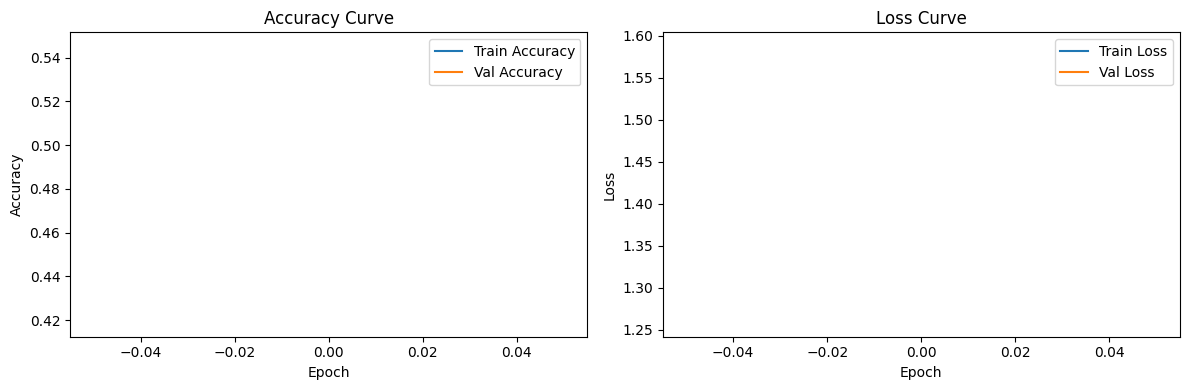

In [26]:
cnn_cifar = build_cifar_cnn()

history = cnn_cifar.fit(
    X_train, y_train_cat,
    epochs=1,
    batch_size=4,
    validation_split=0.2,
    verbose=1
)

# Plot training/loss curves
plot_training_curves(history)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step
              precision    recall  f1-score   support

           0       0.61      0.59      0.60      1000
           1       0.84      0.51      0.63      1000
           2       0.35      0.48      0.40      1000
           3       0.34      0.41      0.37      1000
           4       0.55      0.32      0.41      1000
           5       0.42      0.48      0.45      1000
           6       0.67      0.56      0.61      1000
           7       0.60      0.64      0.62      1000
           8       0.68      0.70      0.69      1000
           9       0.60      0.73      0.66      1000

    accuracy                           0.54     10000
   macro avg       0.57      0.54      0.54     10000
weighted avg       0.57      0.54      0.54     10000



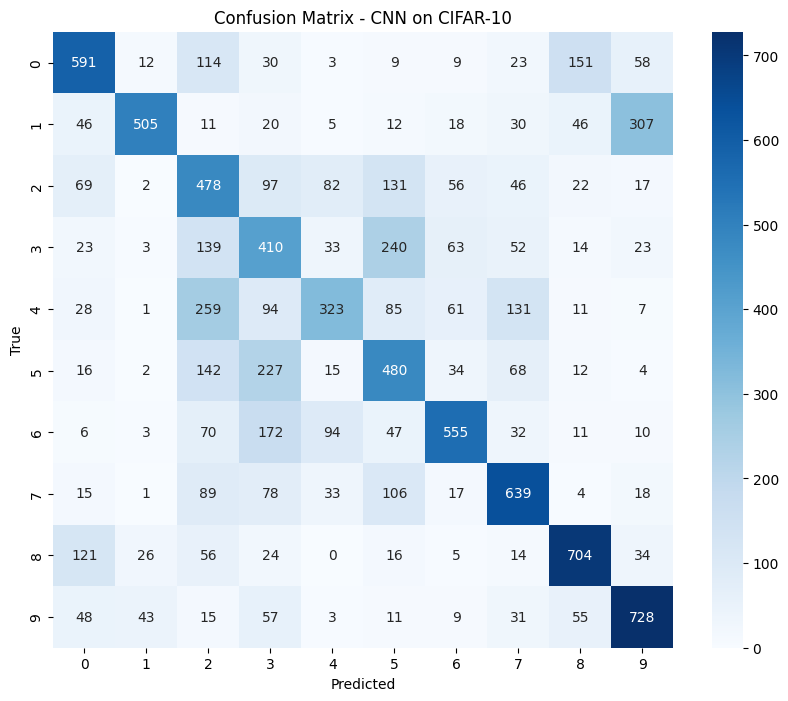

In [27]:
# Predict
y_pred_probs = cnn_cifar.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - CNN on CIFAR-10")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


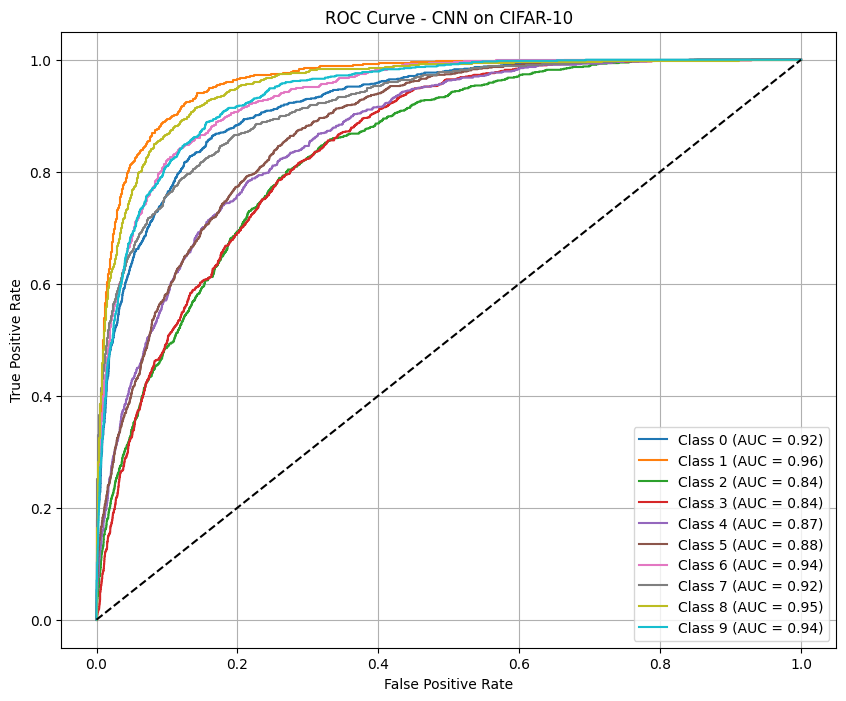

In [28]:
# ROC + AUC
fpr = {}
tpr = {}
roc_auc = {}

for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_cat[:, i], y_pred_probs[:, i])
    roc_auc[i] = roc_auc_score(y_test_cat[:, i], y_pred_probs[:, i])

# Plot ROC
plt.figure(figsize=(10, 8))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - CNN on CIFAR-10')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()


Prepare MNIST for VGG-16

In [29]:
import cv2

# Resize and convert MNIST to 3 channels
def preprocess_mnist_for_vgg(X):
    X_resized = np.zeros((X.shape[0], 48, 48, 3), dtype=np.float32)
    for i in range(X.shape[0]):
        # Resize
        resized = cv2.resize(X[i, :, :, 0], (48,48))
        # Repeat grayscale to 3 channels
        X_resized[i] = np.stack([resized]*3, axis=-1)
    return X_resized

X_train_vgg = preprocess_mnist_for_vgg(X_train)
X_test_vgg = preprocess_mnist_for_vgg(X_test)

print("VGG Input shape:", X_train_vgg.shape)

VGG Input shape: (50000, 48, 48, 3)


In [30]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# Load VGG-16 without top layers
base_model = VGG16(weights=None, include_top=False, input_shape=(48,48,3))

# Add custom classifier layers
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)

vgg_model = Model(inputs=base_model.input, outputs=predictions)

vgg_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


10000/10000 ━━━━━━━━━━━━━━━━━━━━ 413s 40ms/step - accuracy: 0.1031 - loss: 2.3050 - val_accuracy: 0.1016 - val_loss: 2.3028


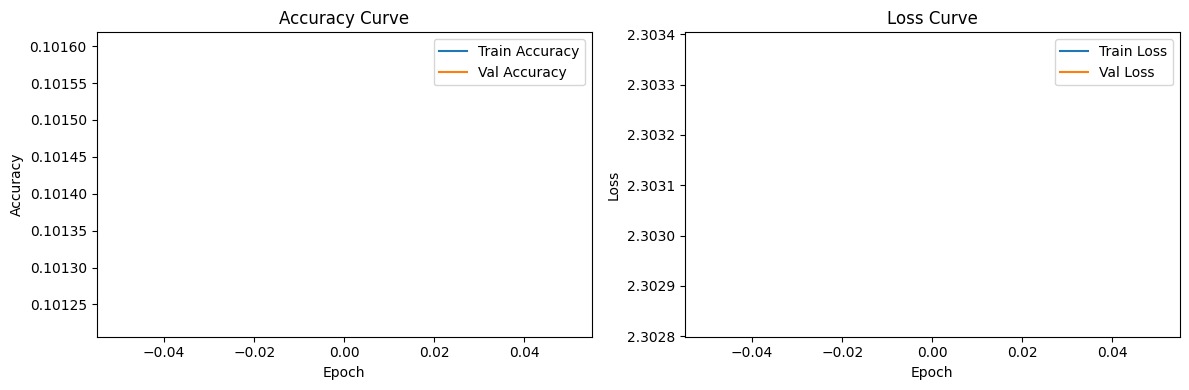

In [31]:
history_vgg = vgg_model.fit(
    X_train_vgg, y_train_cat,
    epochs=1,
    batch_size=4,
    validation_split=0.2,
    verbose=1
)

plot_training_curves(history_vgg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.10      1.00      0.18      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


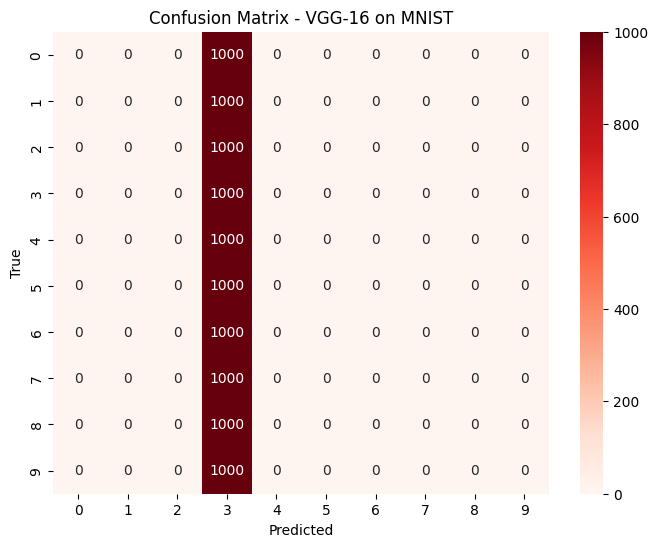

In [34]:
# Predict
y_pred_probs_vgg = vgg_model.predict(X_test_vgg)
y_pred_vgg = np.argmax(y_pred_probs_vgg, axis=1)

print(classification_report(y_test, y_pred_vgg))

# Confusion matrix heatmap
cm_vgg = confusion_matrix(y_test, y_pred_vgg)
plt.figure(figsize=(8,6))
sns.heatmap(cm_vgg, annot=True, fmt='d', cmap='Reds')
plt.title("Confusion Matrix - VGG-16 on MNIST")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


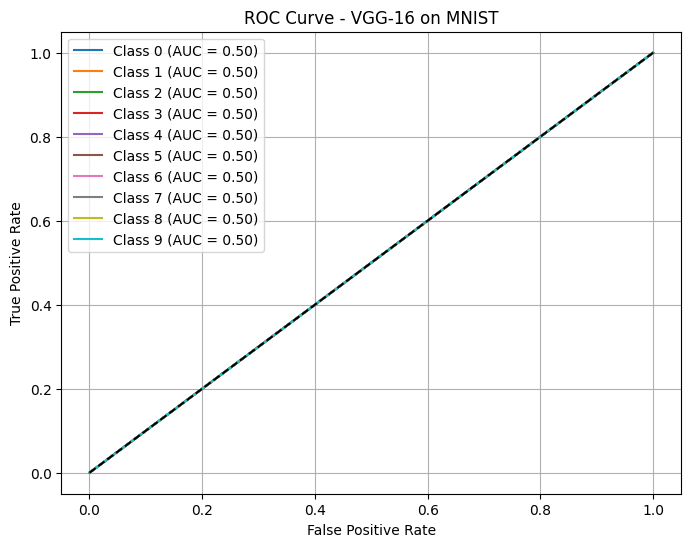

In [35]:
fpr_vgg = {}
tpr_vgg = {}
roc_auc_vgg = {}

for i in range(10):
    fpr_vgg[i], tpr_vgg[i], _ = roc_curve(y_test_cat[:, i], y_pred_probs_vgg[:, i])
    roc_auc_vgg[i] = roc_auc_score(y_test_cat[:, i], y_pred_probs_vgg[:, i])

plt.figure(figsize=(8, 6))
for i in range(10):
    plt.plot(fpr_vgg[i], tpr_vgg[i], label=f'Class {i} (AUC = {roc_auc_vgg[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - VGG-16 on MNIST')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()


VGG-16 on CIFAR-10 Dataset

In [36]:
# Resize CIFAR-10 images from 32x32 to 48x48
def preprocess_cifar_for_vgg(X):
    X_resized = np.zeros((X.shape[0], 48, 48, 3), dtype=np.float32)
    for i in range(X.shape[0]):
        X_resized[i] = cv2.resize(X[i], (48, 48))
    return X_resized

X_train_vgg_cifar = preprocess_cifar_for_vgg(X_train)
X_test_vgg_cifar = preprocess_cifar_for_vgg(X_test)

print("CIFAR-10 VGG input shape:", X_train_vgg_cifar.shape)


CIFAR-10 VGG input shape: (50000, 48, 48, 3)


In [37]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# Reuse previously defined vgg_model or rebuild if needed:
base_model_cifar = VGG16(weights=None, include_top=False, input_shape=(48,48,3))

x = base_model_cifar.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)

vgg_cifar_model = Model(inputs=base_model_cifar.input, outputs=predictions)

vgg_cifar_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 412s 40ms/step - accuracy: 0.0973 - loss: 2.3043 - val_accuracy: 0.1003 - val_loss: 2.3028


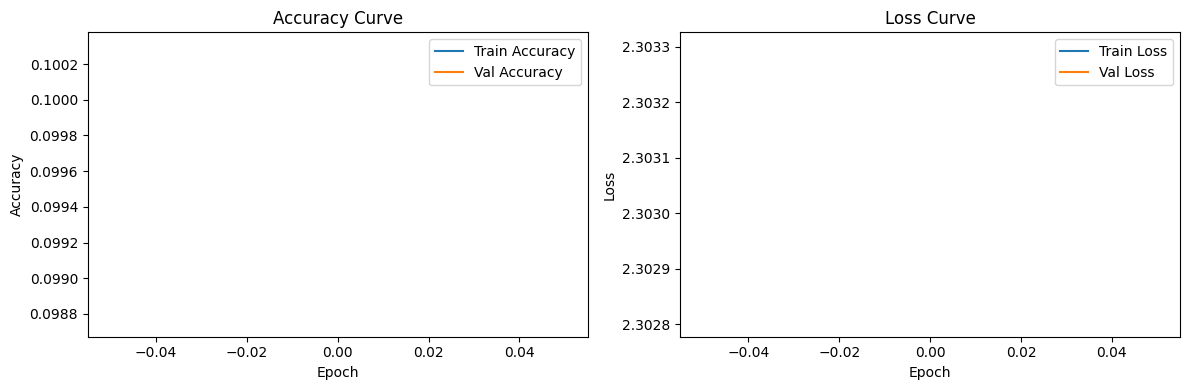

In [38]:
history_vgg_cifar = vgg_cifar_model.fit(
    X_train_vgg_cifar, y_train_cat,
    epochs=1,
    batch_size=4,
    validation_split=0.2,
    verbose=1
)

plot_training_curves(history_vgg_cifar)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.10      1.00      0.18      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


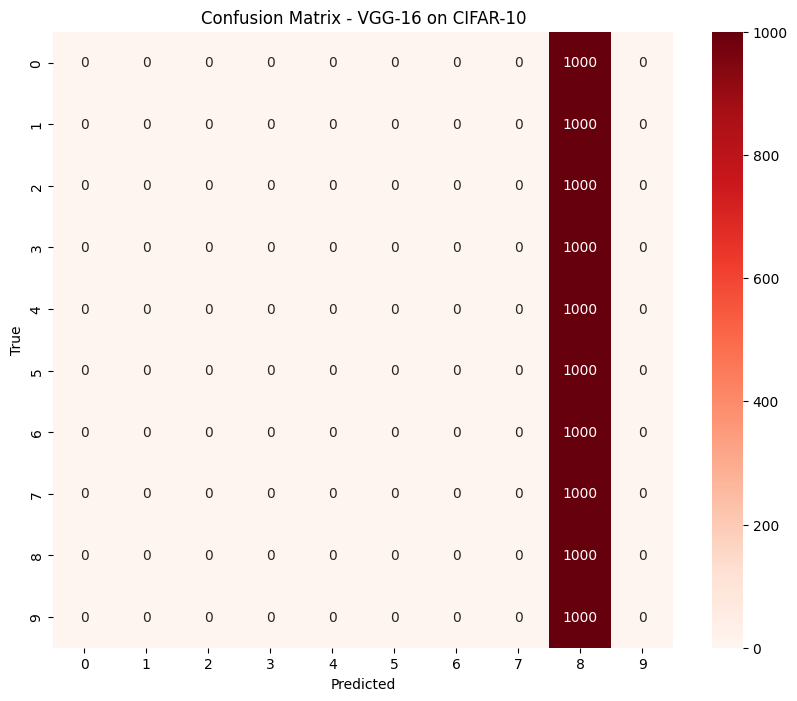

In [40]:
y_pred_probs_vgg_cifar = vgg_cifar_model.predict(X_test_vgg_cifar)
y_pred_vgg_cifar = np.argmax(y_pred_probs_vgg_cifar, axis=1)

print(classification_report(y_test, y_pred_vgg_cifar))

cm_vgg_cifar = confusion_matrix(y_test, y_pred_vgg_cifar)
plt.figure(figsize=(10,8))
sns.heatmap(cm_vgg_cifar, annot=True, fmt='d', cmap='Reds')
plt.title("Confusion Matrix - VGG-16 on CIFAR-10")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


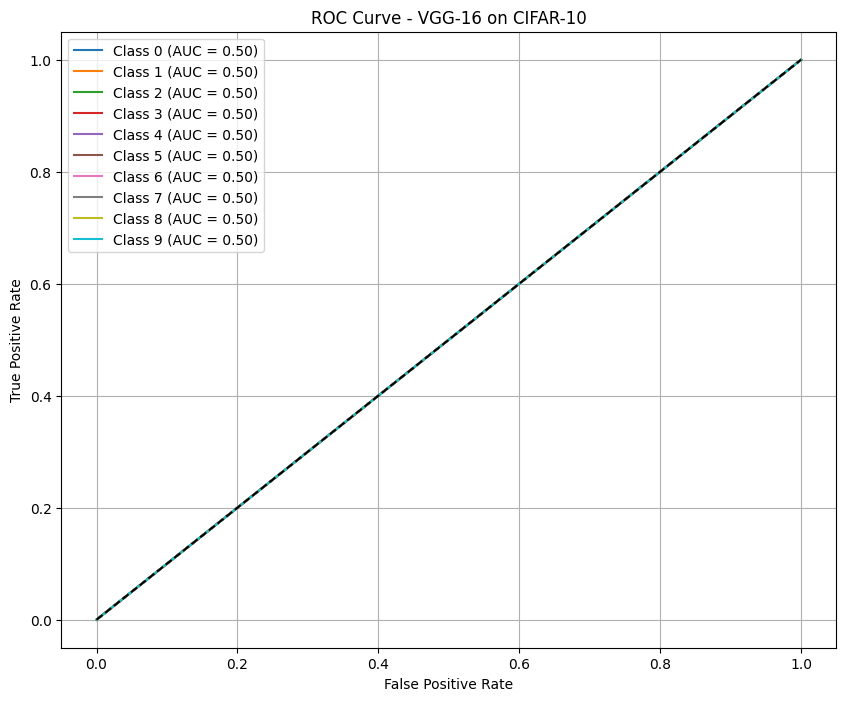

In [41]:
fpr_vgg_cifar = {}
tpr_vgg_cifar = {}
roc_auc_vgg_cifar = {}

for i in range(10):
    fpr_vgg_cifar[i], tpr_vgg_cifar[i], _ = roc_curve(y_test_cat[:, i], y_pred_probs_vgg_cifar[:, i])
    roc_auc_vgg_cifar[i] = roc_auc_score(y_test_cat[:, i], y_pred_probs_vgg_cifar[:, i])

plt.figure(figsize=(10,8))
for i in range(10):
    plt.plot(fpr_vgg_cifar[i], tpr_vgg_cifar[i], label=f'Class {i} (AUC = {roc_auc_vgg_cifar[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - VGG-16 on CIFAR-10')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()


AlexNet Implementation on MNIST

In [42]:
# Reuse previous preprocess function for MNIST to 48x48x3
X_train_alex = preprocess_mnist_for_vgg(X_train)  # Already defined above
X_test_alex = preprocess_mnist_for_vgg(X_test)


In [43]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Model

def build_alexnet(input_shape=(48,48,3), num_classes=10):
    inputs = Input(shape=input_shape)

    x = Conv2D(96, kernel_size=3, strides=1, activation='relu', padding='same')(inputs)
    x = MaxPooling2D(pool_size=2, strides=2)(x)
    x = BatchNormalization()(x)

    x = Conv2D(256, kernel_size=3, strides=1, activation='relu', padding='same')(x)
    x = MaxPooling2D(pool_size=2, strides=2)(x)
    x = BatchNormalization()(x)

    x = Conv2D(384, kernel_size=3, strides=1, activation='relu', padding='same')(x)
    x = Conv2D(384, kernel_size=3, strides=1, activation='relu', padding='same')(x)
    x = Conv2D(256, kernel_size=3, strides=1, activation='relu', padding='same')(x)
    x = MaxPooling2D(pool_size=2, strides=2)(x)
    x = BatchNormalization()(x)

    x = Flatten()(x)
    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

    return model


10000/10000 ━━━━━━━━━━━━━━━━━━━━ 210s 20ms/step - accuracy: 0.1291 - loss: 3.0801 - val_accuracy: 0.2658 - val_loss: 2.1460


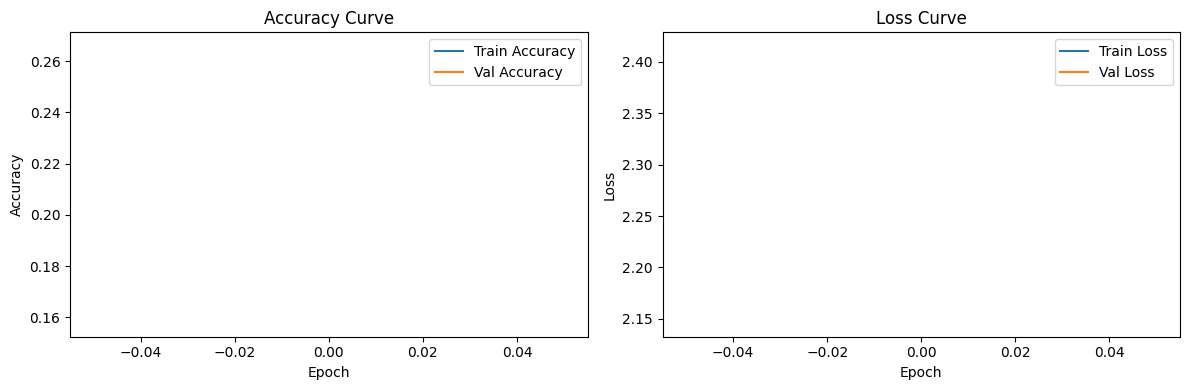

In [44]:
alexnet_model = build_alexnet()

history_alexnet = alexnet_model.fit(
    X_train_alex, y_train_cat,
    epochs=1,
    batch_size=4,
    validation_split=0.2,
    verbose=1
)

plot_training_curves(history_alexnet)


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step
              precision    recall  f1-score   support

           0       0.32      0.39      0.35      1000
           1       0.31      0.14      0.19      1000
           2       0.26      0.28      0.27      1000
           3       0.17      0.05      0.08      1000
           4       0.07      0.01      0.01      1000
           5       0.35      0.05      0.09      1000
           6       0.16      0.54      0.25      1000
           7       0.22      0.23      0.23      1000
           8       0.38      0.43      0.40      1000
           9       0.35      0.46      0.40      1000

    accuracy                           0.26     10000
   macro avg       0.26      0.26      0.23     10000
weighted avg       0.26      0.26      0.23     10000



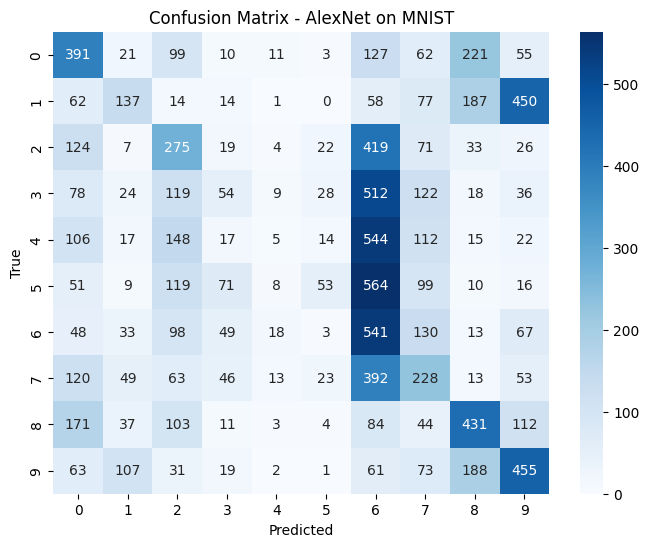

In [45]:
y_pred_probs_alex = alexnet_model.predict(X_test_alex)
y_pred_alex = np.argmax(y_pred_probs_alex, axis=1)

print(classification_report(y_test, y_pred_alex))

cm_alex = confusion_matrix(y_test, y_pred_alex)
plt.figure(figsize=(8,6))
sns.heatmap(cm_alex, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - AlexNet on MNIST")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


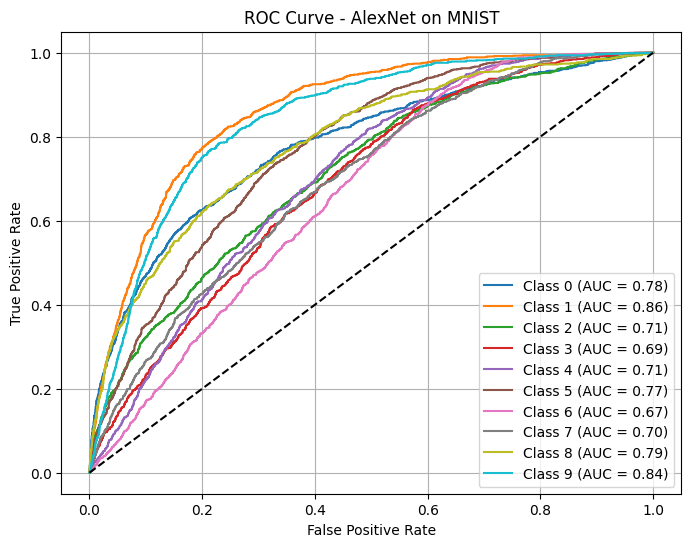

In [46]:
fpr_alex = {}
tpr_alex = {}
roc_auc_alex = {}

for i in range(10):
    fpr_alex[i], tpr_alex[i], _ = roc_curve(y_test_cat[:, i], y_pred_probs_alex[:, i])
    roc_auc_alex[i] = roc_auc_score(y_test_cat[:, i], y_pred_probs_alex[:, i])

plt.figure(figsize=(8, 6))
for i in range(10):
    plt.plot(fpr_alex[i], tpr_alex[i], label=f'Class {i} (AUC = {roc_auc_alex[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - AlexNet on MNIST')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()


AlexNet on CIFAR-10 Dataset

In [47]:
# Use previously resized CIFAR-10 images to 48x48x3
X_train_alex_cifar = preprocess_cifar_for_vgg(X_train)
X_test_alex_cifar = preprocess_cifar_for_vgg(X_test)


In [48]:
# Use the same build_alexnet function (input shape = (48,48,3), classes=10)
alexnet_cifar_model = build_alexnet(input_shape=(48,48,3), num_classes=10)


10000/10000 ━━━━━━━━━━━━━━━━━━━━ 211s 20ms/step - accuracy: 0.1950 - loss: 3.1022 - val_accuracy: 0.3423 - val_loss: 1.8429


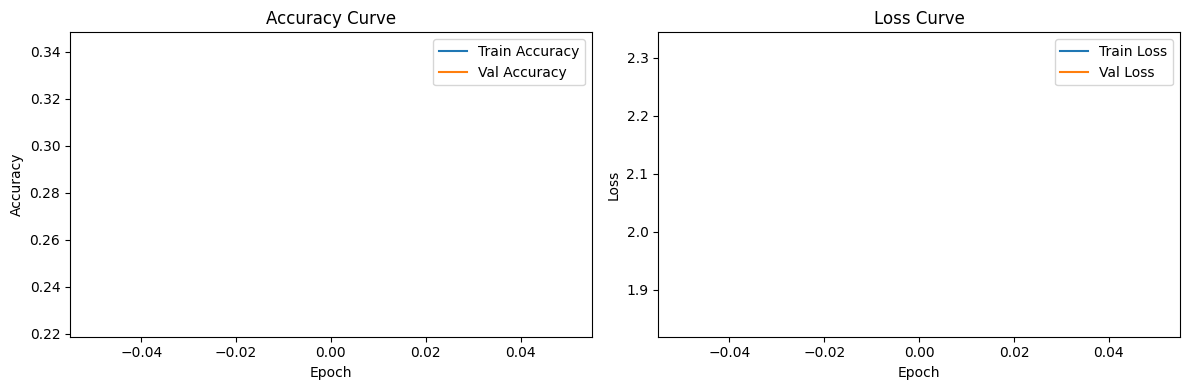

In [49]:
history_alex_cifar = alexnet_cifar_model.fit(
    X_train_alex_cifar, y_train_cat,
    epochs=1,
    batch_size=4,
    validation_split=0.2,
    verbose=1
)

plot_training_curves(history_alex_cifar)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
              precision    recall  f1-score   support

           0       0.44      0.54      0.49      1000
           1       0.58      0.30      0.40      1000
           2       0.27      0.26      0.26      1000
           3       0.21      0.08      0.11      1000
           4       0.26      0.09      0.14      1000
           5       0.44      0.03      0.05      1000
           6       0.23      0.82      0.36      1000
           7       0.43      0.43      0.43      1000
           8       0.47      0.38      0.42      1000
           9       0.46      0.55      0.50      1000

    accuracy                           0.35     10000
   macro avg       0.38      0.35      0.31     10000
weighted avg       0.38      0.35      0.31     10000



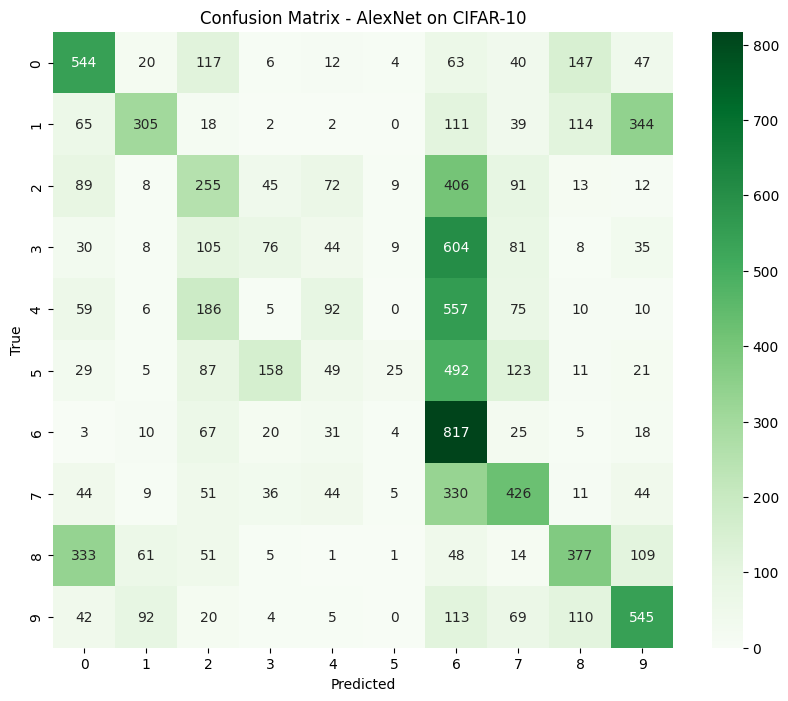

In [51]:
y_pred_probs_alex_cifar = alexnet_cifar_model.predict(X_test_alex_cifar)
y_pred_alex_cifar = np.argmax(y_pred_probs_alex_cifar, axis=1)

print(classification_report(y_test, y_pred_alex_cifar))

cm_alex_cifar = confusion_matrix(y_test, y_pred_alex_cifar)
plt.figure(figsize=(10,8))
sns.heatmap(cm_alex_cifar, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - AlexNet on CIFAR-10")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


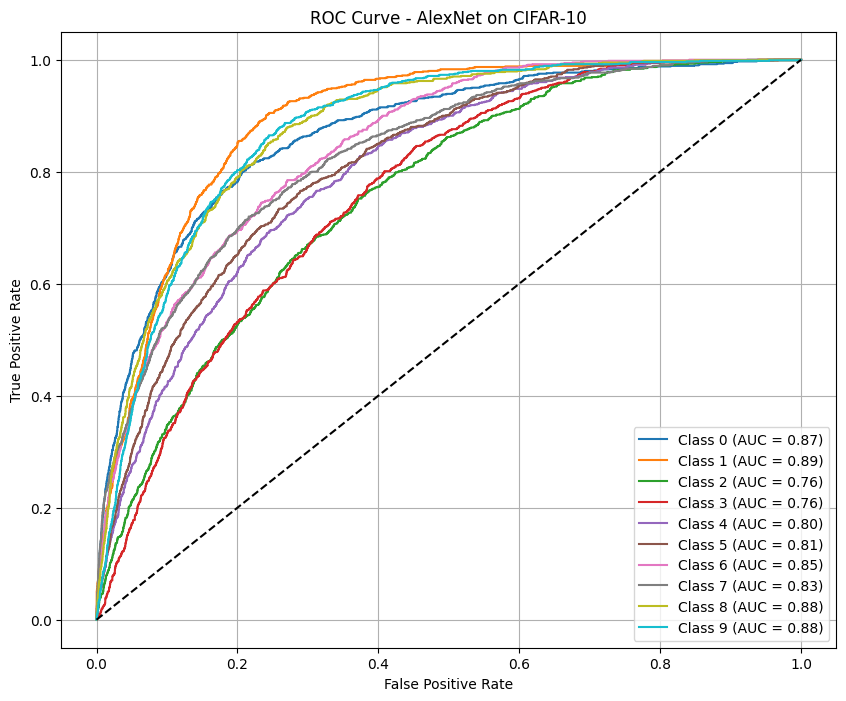

In [52]:
fpr_alex_cifar = {}
tpr_alex_cifar = {}
roc_auc_alex_cifar = {}

for i in range(10):
    fpr_alex_cifar[i], tpr_alex_cifar[i], _ = roc_curve(y_test_cat[:, i], y_pred_probs_alex_cifar[:, i])
    roc_auc_alex_cifar[i] = roc_auc_score(y_test_cat[:, i], y_pred_probs_alex_cifar[:, i])

plt.figure(figsize=(10, 8))
for i in range(10):
    plt.plot(fpr_alex_cifar[i], tpr_alex_cifar[i], label=f'Class {i} (AUC = {roc_auc_alex_cifar[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - AlexNet on CIFAR-10')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()


GoogLeNet (Inception v1) on MNIST

In [53]:
from tensorflow.keras.layers import concatenate, Conv2D, MaxPooling2D, AveragePooling2D

def inception_module(x, filters):
    f1, f3r, f3, f5r, f5, proj = filters

    path1 = Conv2D(f1, (1,1), padding='same', activation='relu')(x)

    path2 = Conv2D(f3r, (1,1), padding='same', activation='relu')(x)
    path2 = Conv2D(f3, (3,3), padding='same', activation='relu')(path2)

    path3 = Conv2D(f5r, (1,1), padding='same', activation='relu')(x)
    path3 = Conv2D(f5, (5,5), padding='same', activation='relu')(path3)

    path4 = MaxPooling2D((3,3), strides=(1,1), padding='same')(x)
    path4 = Conv2D(proj, (1,1), padding='same', activation='relu')(path4)

    return concatenate([path1, path2, path3, path4], axis=-1)


In [54]:
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.keras.models import Model

def build_googlenet(input_shape=(48,48,3), num_classes=10):
    inputs = Input(shape=input_shape)

    x = Conv2D(64, (7,7), strides=(2,2), padding='same', activation='relu')(inputs)
    x = MaxPooling2D((3,3), strides=(2,2), padding='same')(x)

    x = Conv2D(64, (1,1), padding='same', activation='relu')(x)
    x = Conv2D(192, (3,3), padding='same', activation='relu')(x)
    x = MaxPooling2D((3,3), strides=(2,2), padding='same')(x)

    x = inception_module(x, [64, 96, 128, 16, 32, 32])
    x = inception_module(x, [128, 128, 192, 32, 96, 64])
    x = MaxPooling2D((3,3), strides=(2,2), padding='same')(x)

    x = inception_module(x, [192, 96, 208, 16, 48, 64])
    x = inception_module(x, [160, 112, 224, 24, 64, 64])
    x = inception_module(x, [128, 128, 256, 24, 64, 64])
    x = inception_module(x, [112, 144, 288, 32, 64, 64])
    x = inception_module(x, [256, 160, 320, 32, 128, 128])
    x = MaxPooling2D((3,3), strides=(2,2), padding='same')(x)

    x = inception_module(x, [256, 160, 320, 32, 128, 128])
    x = inception_module(x, [384, 192, 384, 48, 128, 128])

    x = AveragePooling2D(pool_size=(2,2), strides=(1,1), padding='valid')(x)
    x = Dropout(0.4)(x)
    x = Flatten()(x)

    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

    return model


In [55]:
# Reuse previously preprocessed MNIST images for VGG (48x48x3)
X_train_googlenet = X_train_vgg  # Already preprocessed
X_test_googlenet = X_test_vgg


10000/10000 ━━━━━━━━━━━━━━━━━━━━ 161s 13ms/step - accuracy: 0.0987 - loss: 2.3050 - val_accuracy: 0.0997 - val_loss: 2.3028


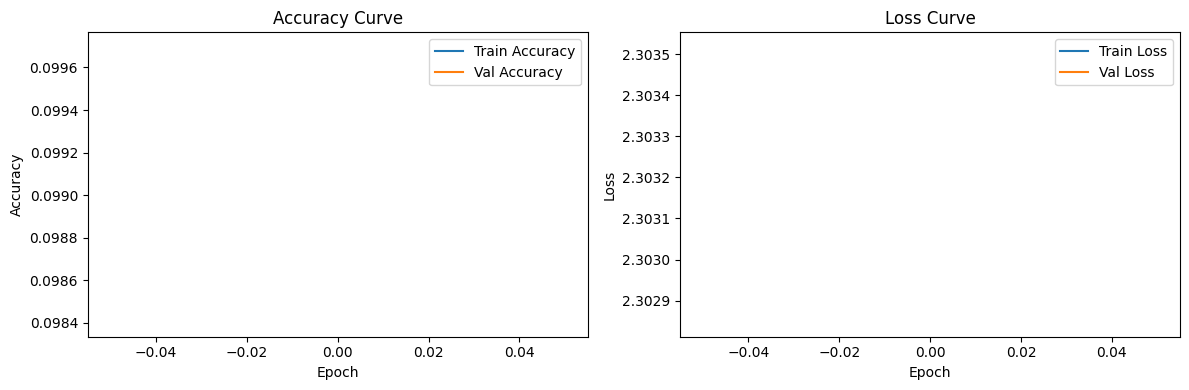

In [56]:
googlenet_model = build_googlenet()

history_googlenet = googlenet_model.fit(
    X_train_googlenet, y_train_cat,
    epochs=1,
    batch_size=4,
    validation_split=0.2,
    verbose=1
)

plot_training_curves(history_googlenet)


313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.10      1.00      0.18      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


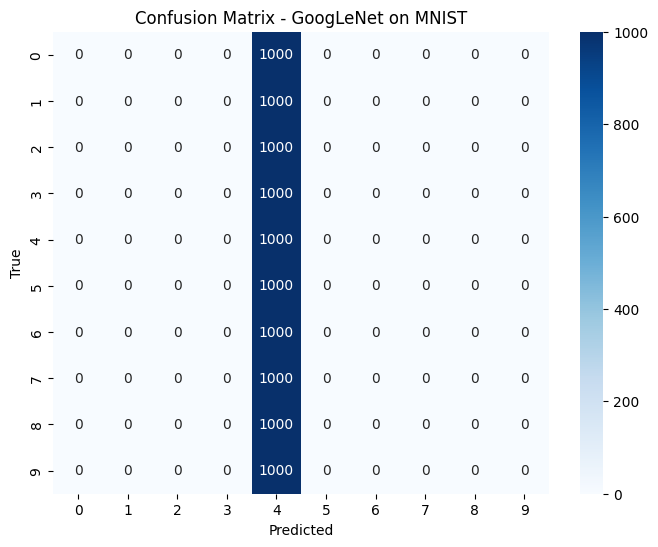

In [57]:
y_pred_probs_googlenet = googlenet_model.predict(X_test_googlenet)
y_pred_googlenet = np.argmax(y_pred_probs_googlenet, axis=1)

print(classification_report(y_test, y_pred_googlenet))

cm_googlenet = confusion_matrix(y_test, y_pred_googlenet)
plt.figure(figsize=(8,6))
sns.heatmap(cm_googlenet, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - GoogLeNet on MNIST")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


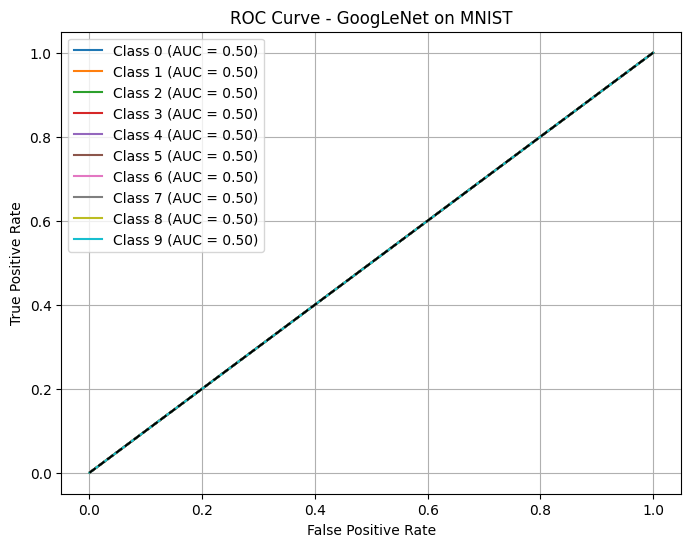

In [58]:
fpr_googlenet = {}
tpr_googlenet = {}
roc_auc_googlenet = {}

for i in range(10):
    fpr_googlenet[i], tpr_googlenet[i], _ = roc_curve(y_test_cat[:, i], y_pred_probs_googlenet[:, i])
    roc_auc_googlenet[i] = roc_auc_score(y_test_cat[:, i], y_pred_probs_googlenet[:, i])

plt.figure(figsize=(8,6))
for i in range(10):
    plt.plot(fpr_googlenet[i], tpr_googlenet[i], label=f'Class {i} (AUC = {roc_auc_googlenet[i]:.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.title('ROC Curve - GoogLeNet on MNIST')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()


GoogLeNet on CIFAR-10

In [59]:
# Reuse CIFAR-10 preprocessed data for 48x48x3
X_train_googlenet_cifar = X_train_vgg_cifar  # already resized and normalized
X_test_googlenet_cifar = X_test_vgg_cifar


In [60]:
# Reuse build_googlenet function, input shape (48,48,3), classes=10
googlenet_cifar_model = build_googlenet(input_shape=(48,48,3), num_classes=10)


20000/20000 ━━━━━━━━━━━━━━━━━━━━ 277s 12ms/step - accuracy: 0.0986 - loss: 2.3044 - val_accuracy: 0.0977 - val_loss: 2.3033


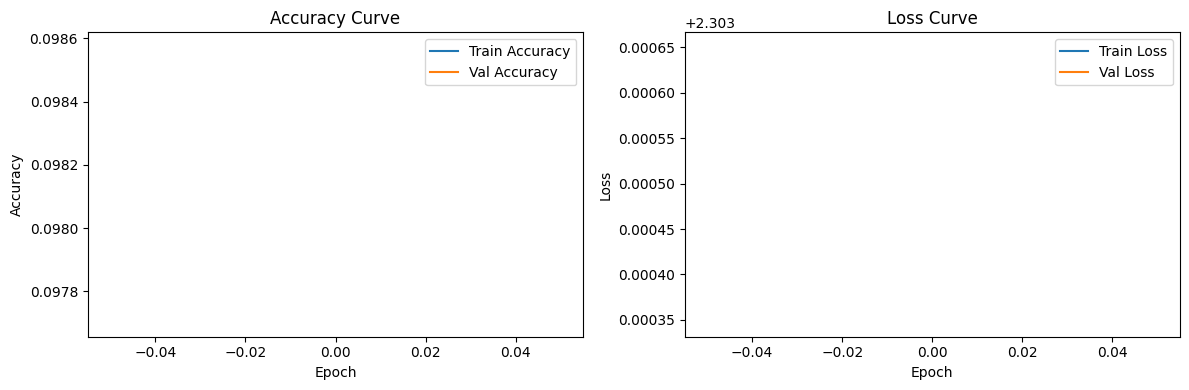

In [61]:
history_googlenet_cifar = googlenet_cifar_model.fit(
    X_train_googlenet_cifar, y_train_cat,
    epochs=1,
    batch_size=2,
    validation_split=0.2,
    verbose=1
)

plot_training_curves(history_googlenet_cifar)


313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.10      1.00      0.18      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


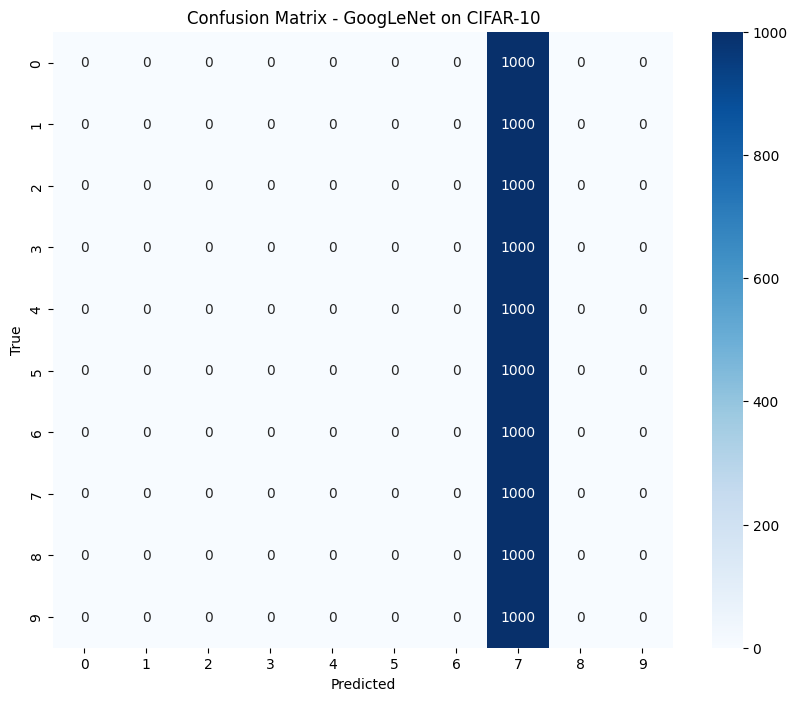

In [62]:
y_pred_probs_googlenet_cifar = googlenet_cifar_model.predict(X_test_googlenet_cifar)
y_pred_googlenet_cifar = np.argmax(y_pred_probs_googlenet_cifar, axis=1)

print(classification_report(y_test, y_pred_googlenet_cifar))

cm_googlenet_cifar = confusion_matrix(y_test, y_pred_googlenet_cifar)
plt.figure(figsize=(10,8))
sns.heatmap(cm_googlenet_cifar, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - GoogLeNet on CIFAR-10")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


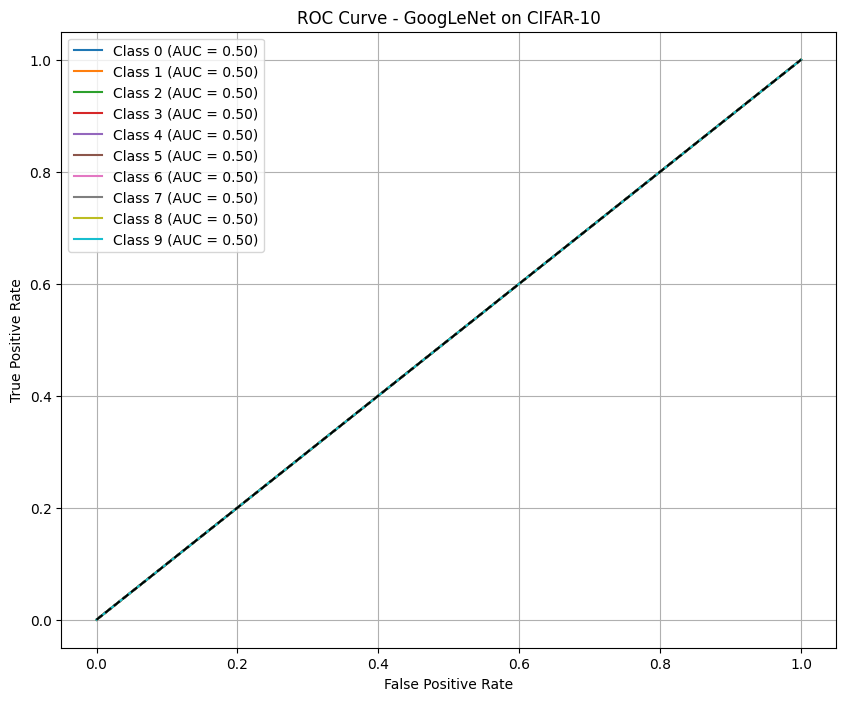

In [63]:
fpr_googlenet_cifar = {}
tpr_googlenet_cifar = {}
roc_auc_googlenet_cifar = {}

for i in range(10):
    fpr_googlenet_cifar[i], tpr_googlenet_cifar[i], _ = roc_curve(y_test_cat[:, i], y_pred_probs_googlenet_cifar[:, i])
    roc_auc_googlenet_cifar[i] = roc_auc_score(y_test_cat[:, i], y_pred_probs_googlenet_cifar[:, i])

plt.figure(figsize=(10,8))
for i in range(10):
    plt.plot(fpr_googlenet_cifar[i], tpr_googlenet_cifar[i], label=f'Class {i} (AUC = {roc_auc_googlenet_cifar[i]:.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.title('ROC Curve - GoogLeNet on CIFAR-10')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()


RNN Implementation on MNIST and CIFAR-10

In [2]:
# Load dataset again in case the previous cell was not run
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train_rnn_mnist = X_train.squeeze().astype('float32') / 255.0
X_test_rnn_mnist = X_test.squeeze().astype('float32') / 255.0

In [4]:
# Load CIFAR-10 dataset
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Reshape CIFAR-10: (num_samples, timesteps=32, features=32*3=96)
X_train_rnn_cifar = X_train.reshape(-1, 32, 32*3).astype('float32') / 255.0
X_test_rnn_cifar = X_test.reshape(-1, 32, 32*3).astype('float32') / 255.0

In [14]:
from tensorflow.keras.layers import LSTM, SimpleRNN, Input, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

def build_rnn(input_shape, num_classes=10):
    inputs = Input(shape=input_shape)
    x = LSTM(128, return_sequences=False)(inputs)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

12000/12000 ━━━━━━━━━━━━━━━━━━━━ 75s 6ms/step - accuracy: 0.7861 - loss: 0.6417 - val_accuracy: 0.9696 - val_loss: 0.1086


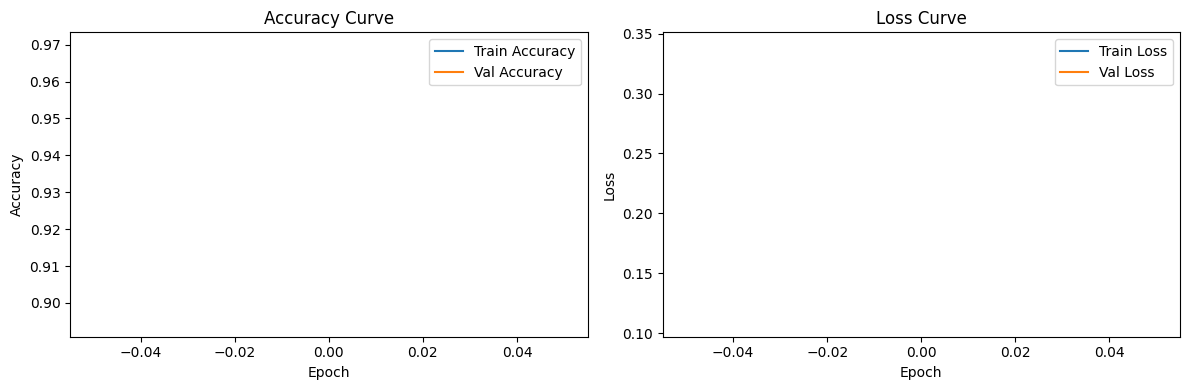

In [18]:
# Load dataset again and one-hot encode labels in case the previous cell was not run
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt # Import matplotlib
(X_train, y_train), (X_test, y_test) = mnist.load_data()
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


rnn_mnist_model = build_rnn(input_shape=(28, 28))

history_rnn_mnist = rnn_mnist_model.fit(
    X_train_rnn_mnist, y_train_cat,
    epochs=1,
    batch_size=4,
    validation_split=0.2,
    verbose=1
)

# Plot training & validation accuracy/loss
# The plot_training_curves function is defined in cell -5cV9NEmaAyN
# To resolve the NameError, we need to ensure cell -5cV9NEmaAyN is executed before this cell.
# There is no direct way to ensure cell execution order from here.
# A workaround is to redefine the function in this cell or a preceding cell.
# Since the function already exists in a notebook cell, I will suggest executing the cell that defines it first.
# For now, I will add the function definition here for demonstration and immediate fix within this cell's execution context.
def plot_training_curves(history):
    plt.figure(figsize=(12, 4))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


plot_training_curves(history_rnn_mnist)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.98      0.98      1135
           2       0.96      0.97      0.96      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.96      0.97       982
           5       0.97      0.96      0.96       892
           6       0.96      0.98      0.97       958
           7       0.95      0.98      0.97      1028
           8       0.97      0.95      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



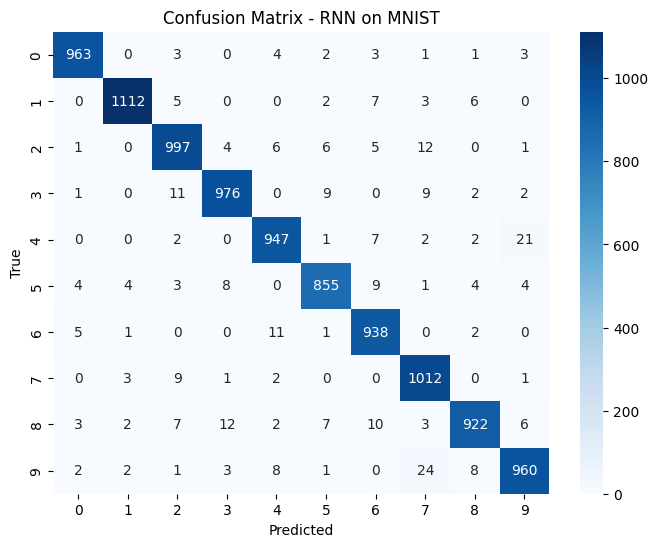

In [20]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


y_pred_probs_rnn_mnist = rnn_mnist_model.predict(X_test_rnn_mnist)
y_pred_rnn_mnist = np.argmax(y_pred_probs_rnn_mnist, axis=1)

print(classification_report(y_test, y_pred_rnn_mnist))

cm_rnn_mnist = confusion_matrix(y_test, y_pred_rnn_mnist)
plt.figure(figsize=(8,6))
sns.heatmap(cm_rnn_mnist, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - RNN on MNIST")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 64s 6ms/step - accuracy: 0.1054 - loss: 2.3173 - val_accuracy: 0.1055 - val_loss: 2.3044


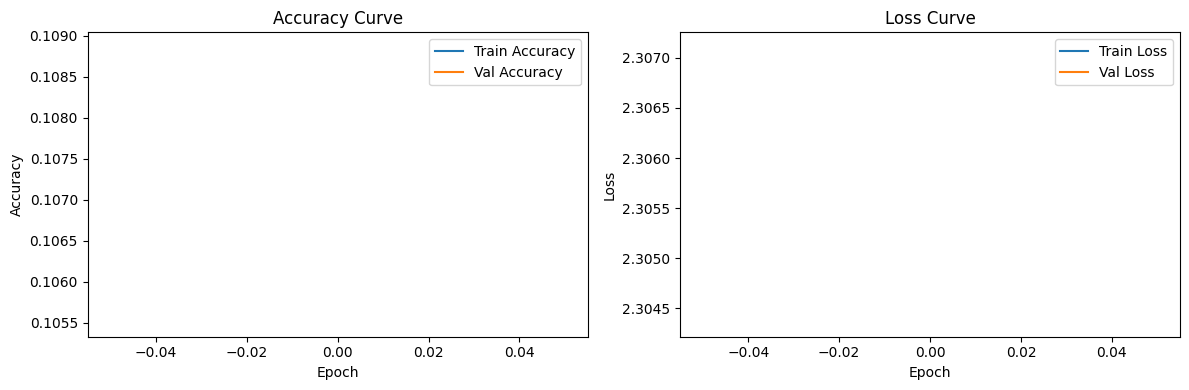

In [21]:
rnn_cifar_model = build_rnn(input_shape=(32, 96))

history_rnn_cifar = rnn_cifar_model.fit(
    X_train_rnn_cifar, y_train_cat,
    epochs=1,
    batch_size=4,
    validation_split=0.2,
    verbose=1
)

plot_training_curves(history_rnn_cifar)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.12      0.37      0.18      1135
           2       0.00      0.00      0.00      1032
           3       0.00      0.00      0.00      1010
           4       0.00      0.00      0.00       982
           5       0.00      0.00      0.00       892
           6       0.00      0.00      0.00       958
           7       0.10      0.28      0.15      1028
           8       0.04      0.00      0.00       974
           9       0.10      0.35      0.15      1009

    accuracy                           0.11     10000
   macro avg       0.04      0.10      0.05     10000
weighted avg       0.04      0.11      0.05     10000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


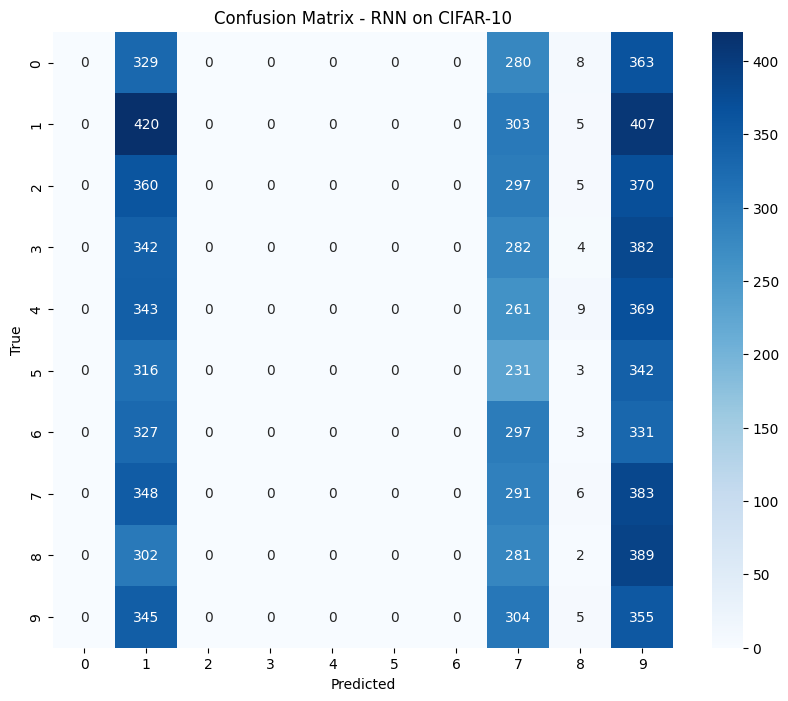

In [22]:
y_pred_probs_rnn_cifar = rnn_cifar_model.predict(X_test_rnn_cifar)
y_pred_rnn_cifar = np.argmax(y_pred_probs_rnn_cifar, axis=1)

print(classification_report(y_test, y_pred_rnn_cifar))

cm_rnn_cifar = confusion_matrix(y_test, y_pred_rnn_cifar)
plt.figure(figsize=(10,8))
sns.heatmap(cm_rnn_cifar, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - RNN on CIFAR-10")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


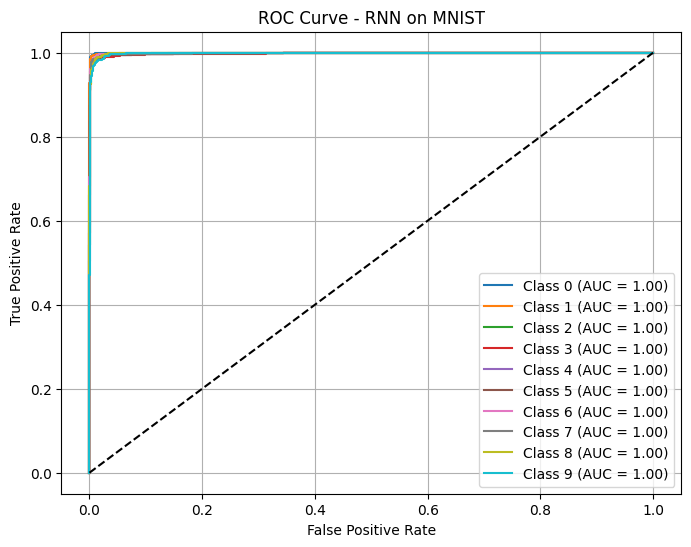

In [24]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr_rnn = {}
tpr_rnn = {}
roc_auc_rnn = {}

for i in range(10):
    fpr_rnn[i], tpr_rnn[i], _ = roc_curve(y_test_cat[:, i], y_pred_probs_rnn_mnist[:, i])
    roc_auc_rnn[i] = roc_auc_score(y_test_cat[:, i], y_pred_probs_rnn_mnist[:, i])

plt.figure(figsize=(8,6))
for i in range(10):
    plt.plot(fpr_rnn[i], tpr_rnn[i], label=f'Class {i} (AUC = {roc_auc_rnn[i]:.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.title('ROC Curve - RNN on MNIST')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()